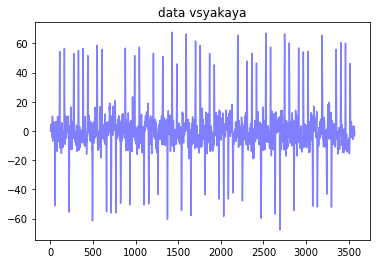

oaekavnO


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

up = 25
down = -25

code = np.array([+1, +1, +1, -1, -1, -1, +1, -1, -1, +1, -1], dtype='int8') 
code = np.repeat(code, 5)

with open('Океанова.dat') as f:
    data = np.array(f.readlines(), dtype='float32')

signal = np.convolve(data, code[::-1], mode='full')

plt.plot(signal, color= 'blue', alpha = 0.5)
plt.title('data vsyakaya')
plt.show()

bit = []

for i in range(signal.shape[0]):
    if signal[i] > up and signal[i - 1] < signal[i] and signal[i + 1] < signal[i]:
        bit.append(1)
    elif signal[i] < down and signal[i - 1] > signal[i] and signal[i + 1] > signal[i]:
        bit.append(0)

message = np.packbits(np.array(bit)).tobytes().decode('ascii')
print(message)

with open('wifi.json', 'w') as file:
    json.dump({"message": message}, file)